In [91]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime

In [92]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [93]:
# Bank of America
BAC = data.DataReader('BAC','yahoo', start, end)

# Citigroup
C = data.DataReader('C','yahoo', start, end)

# Goldman Sachs
GS = data.DataReader('GS','yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader('JPM','yahoo', start, end)

# Morgan Stanley
MS = data.DataReader('MS','yahoo', start, end)

# Wells Fargo
WFC = data.DataReader('WFC','yahoo', start, end)

In [94]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], 'yahoo',start,end)

In [95]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [96]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC], axis = 'columns', keys = tickers)

In [97]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [98]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.726604  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.674480  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.696808  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.799999  31.530001  10870000.0  20.171795  
2006-01-05   31.500000  31.495001  10158000.0  20.149401  
2006-01-06   31.580000  31.680000   8403800.0  20.267757  
2006-01-09   31.674999  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

In [99]:
bank_stocks.xs(key = 'Close',axis = 1, level = 'Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [100]:
returns = pd.DataFrame()

In [101]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head(10)

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789
2006-01-11,-0.002380,0.009065,-0.000454,-0.000737,0.005910,0.005213
2006-01-12,-0.006508,0.001021,0.002122,-0.018428,-0.001679,-0.011630
2006-01-13,0.000000,-0.002243,0.007637,-0.000751,-0.001513,0.005724


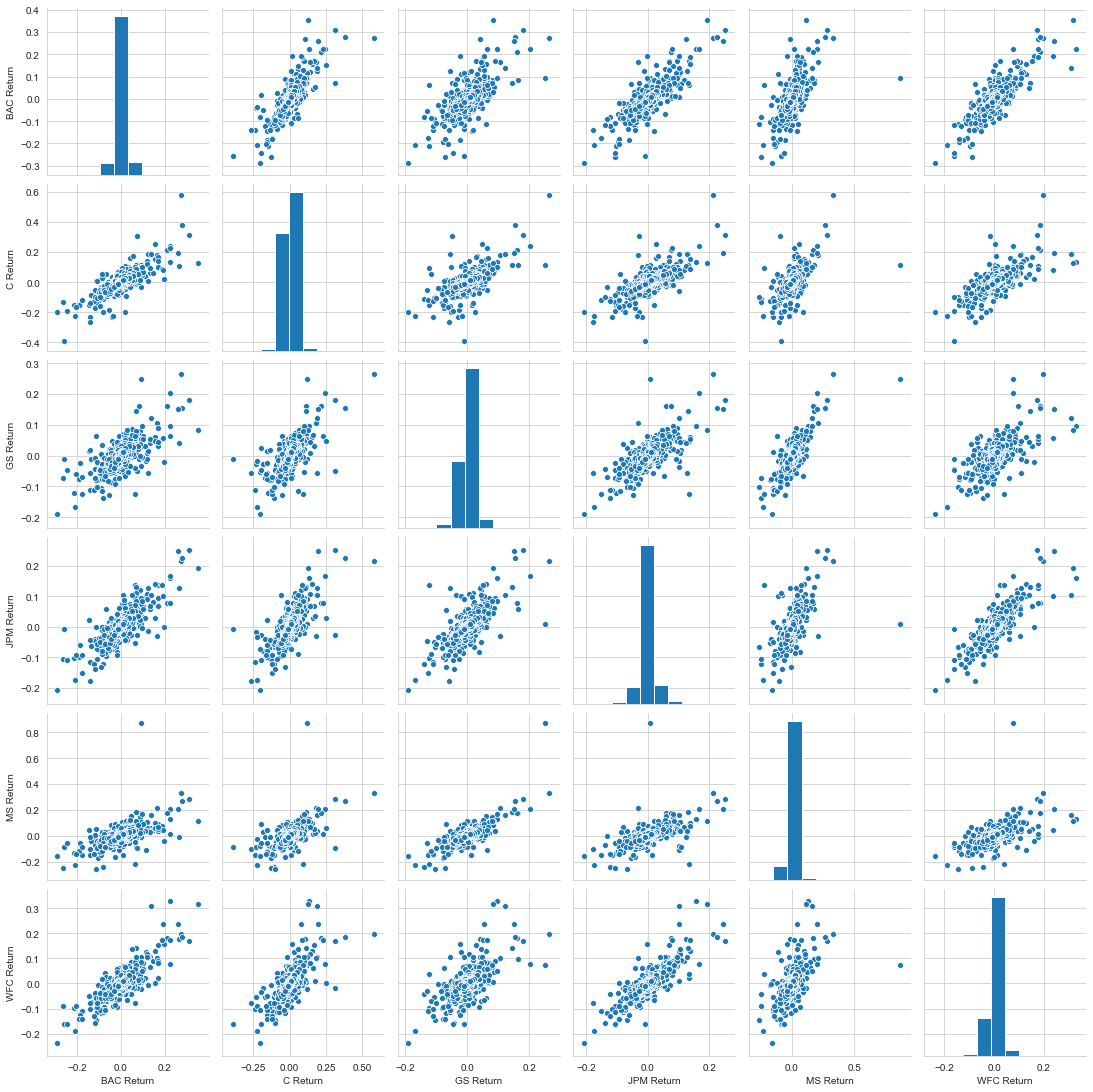

In [102]:
import seaborn as sns
sns.pairplot(returns[1:])

In [104]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [105]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [106]:
returns.std()

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [107]:
returns.loc['2015-1-1':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

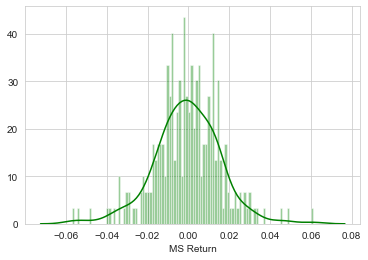

In [108]:
sns.distplot(returns.loc['2015-1-1':'2015-12-31']['MS Return'],color = 'green', bins = 100)

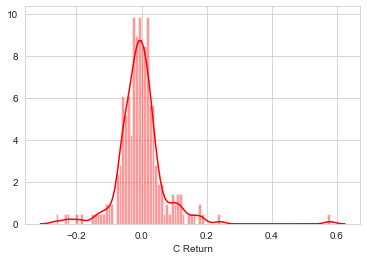

In [109]:
sns.distplot(returns.loc['2008-1-1':'2008-12-31']['C Return'],color = 'red', bins = 100)

In [110]:
sns.set_style('whitegrid')

In [111]:
import plotly
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()

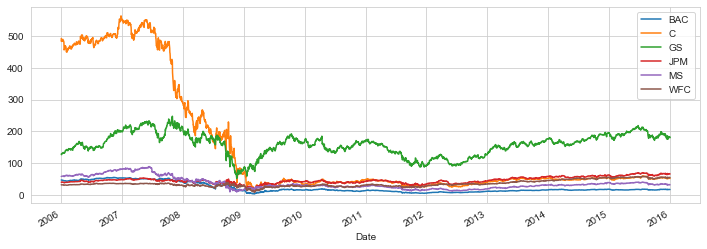

In [112]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize = (12,4), label = tick)
    
plt.legend()

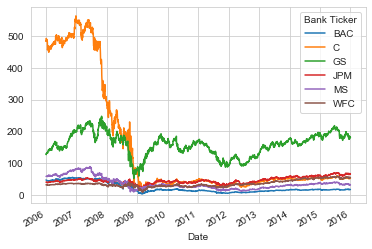

In [113]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [114]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

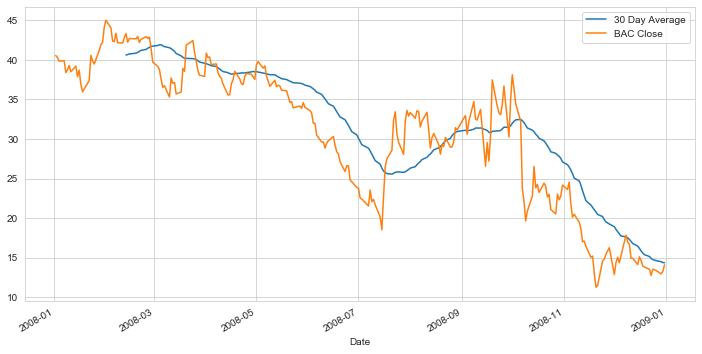

In [116]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-1-1':'2009-1-1'].rolling(window=30).mean().plot(label='30 Day Average')
BAC['Close'].loc['2008-1-1':'2009-1-1'].plot(label='BAC Close')
plt.legend()

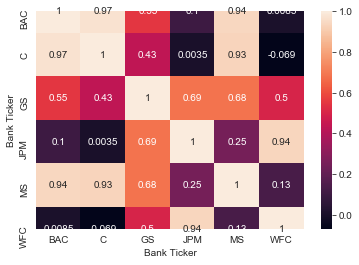

In [120]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

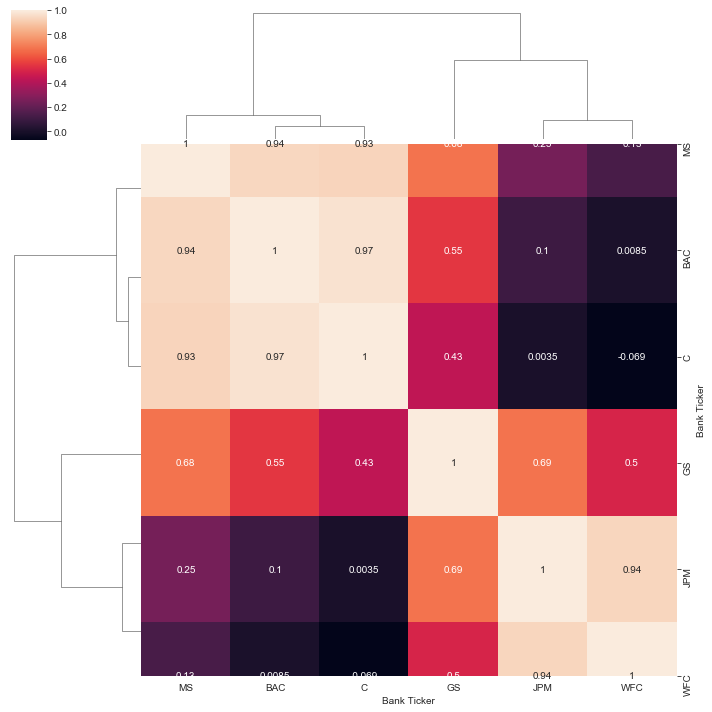

In [121]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [124]:
BAC.loc['2015-1-1':'2016-1-1'].iplot(kind='candle')

In [130]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [127]:
MS.loc['2015-1-1':'2015-12-31'].ta_plot(study='sma')

In [132]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [134]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')